# Библиотеки

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Задача 1

Коэффициенты полнинома 1: [8.70824274e-18 2.58903983e-01]
Коэффициенты полнинома 2: [-6.02263994e-01 -1.85775845e-16  4.88337886e-01]
Коэффициенты полнинома 3: [ 4.27037156e-16 -6.02263994e-01 -3.71551690e-16  4.88337886e-01]
Коэффициенты полнинома 4: [ 1.52385748e+00 -5.01077447e-16 -2.07280867e+00  1.02287319e-16
  6.52845948e-01]
Коэффициенты полнинома 5: [ 1.88107935e-15  1.52385748e+00 -1.50323234e-15 -2.07280867e+00
  1.85775845e-16  6.52845948e-01]
Коэффициенты полнинома 6: [-4.22098005e+00  1.68348063e-15  7.82791860e+00  9.68232832e-16
 -4.35726170e+00  1.91018598e-16  7.70264002e-01]
Коэффициенты полнинома 7: [-2.77715531e-14 -4.22098005e+00  4.43316566e-14  7.82791860e+00
 -1.90409430e-14 -4.35726170e+00  2.41508599e-15  7.70264002e-01]
Коэффициенты полнинома 8: [ 1.33727155e+01 -6.39503955e-14 -3.04569742e+01  5.16412254e-14
  2.35838705e+01 -1.91807100e-14 -7.31204912e+00  1.94112514e-14
  8.54202123e-01]
Коэффициенты полнинома 9: [-2.72210789e-13  1.33727155e+01  5.021290

/tmp/ipykernel_55203/4219254741.py:17: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X_train, Y_train, deg)


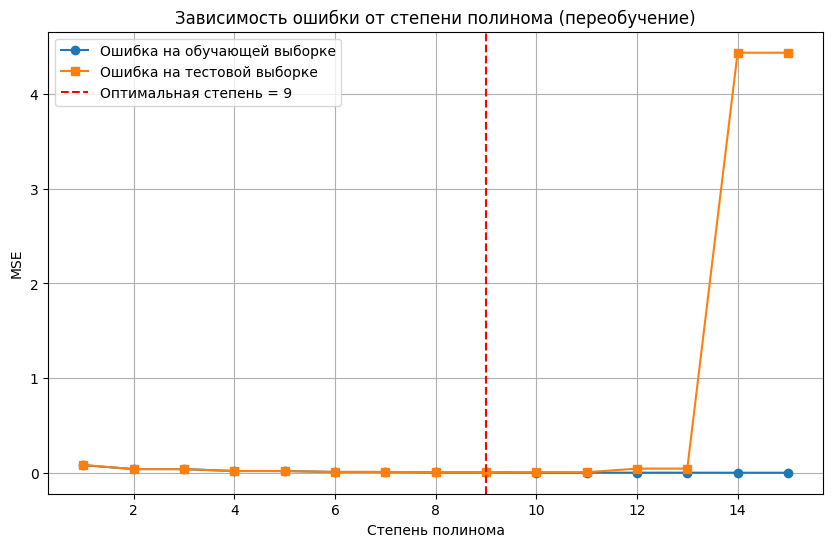

Оптимальная степень полинома по тестовой выборке: 9
MSE на обучающей выборке: 0.003293
MSE на тестовой выборке: 0.004523


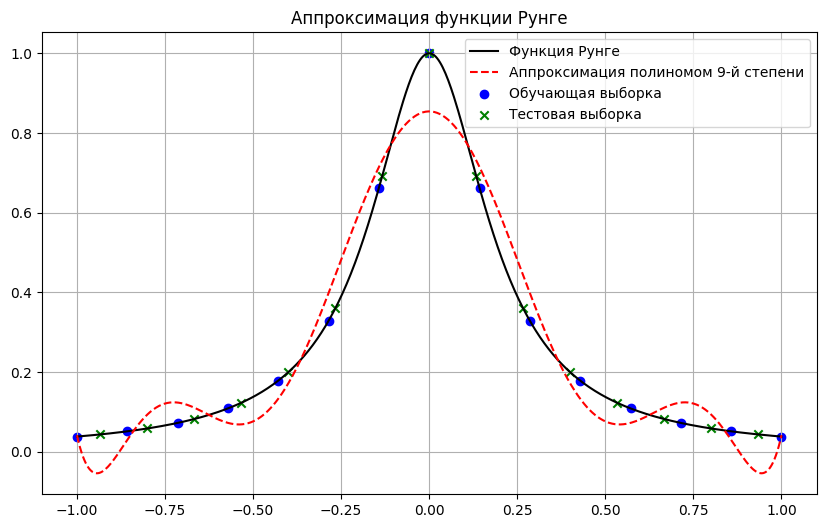

Координаты минимума: (2, 5)
Значение функции в минимуме: 0
Гессиан:
 Matrix([[2, 0], [0, 2]])


In [81]:
def runge_function(x):
    return 1 / (1 + 25 * x**2)

def generate_samples(l=15):
    X_train = np.linspace(-1, 1, l)
    Y_train = runge_function(X_train)
    
    step = 2 / l
    X_test = np.linspace(-1 + step/2, 1 - step/2, l)
    Y_test = runge_function(X_test)
    
    return X_train, Y_train, X_test, Y_test

def fit_polynomials(X_train, Y_train, X_test, Y_test, max_degree=15):
    results = {}
    for deg in range(1, max_degree+1):
        coeffs = np.polyfit(X_train, Y_train, deg)
        print(f"Коэффициенты полнинома {deg}: {coeffs}")
        poly = np.poly1d(coeffs)
        
        Y_train_pred = poly(X_train)
        Y_test_pred = poly(X_test)
        
        mse_train = np.mean((Y_train - Y_train_pred) ** 2)
        mse_test = np.mean((Y_test - Y_test_pred) ** 2)
        
        results[deg] = {
            "poly": poly,
            "mse_train": mse_train,
            "mse_test": mse_test
        }
    return results

def plot_mse(results):
    degrees = list(results.keys())
    mse_train = [results[d]["mse_train"] for d in degrees]
    mse_test = [results[d]["mse_test"] for d in degrees]
    
    best_degree = min(results, key=lambda d: results[d]["mse_test"])
    
    plt.figure(figsize=(10, 6))
    plt.plot(degrees, mse_train, "o-", label="Ошибка на обучающей выборке")
    plt.plot(degrees, mse_test, "s-", label="Ошибка на тестовой выборке")
    plt.axvline(best_degree, color="red", linestyle="--", label=f"Оптимальная степень = {best_degree}")
    plt.xlabel("Степень полинома")
    plt.ylabel("MSE")
    plt.title("Зависимость ошибки от степени полинома (переобучение)")
    plt.legend()
    plt.grid()
    plt.show()
    
    return best_degree

def plot_results(X_train, Y_train, X_test, Y_test, poly):
    x_plot = np.linspace(-1, 1, 500)
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, runge_function(x_plot), "k-", label="Функция Рунге")
    plt.plot(x_plot, poly(x_plot), "r--", label=f"Аппроксимация полиномом {poly.order}-й степени")
    plt.scatter(X_train, Y_train, color="blue", label="Обучающая выборка")
    plt.scatter(X_test, Y_test, color="green", marker="x", label="Тестовая выборка")
    plt.legend()
    plt.grid()
    plt.title("Аппроксимация функции Рунге")
    plt.show()

X_train, Y_train, X_test, Y_test = generate_samples(l=15)
results = fit_polynomials(X_train, Y_train, X_test, Y_test, max_degree=15)

best_degree = plot_mse(results)

best_poly = results[best_degree]["poly"]
mse_train = results[best_degree]["mse_train"]
mse_test = results[best_degree]["mse_test"]

print(f"Оптимальная степень полинома по тестовой выборке: {best_degree}")
print(f"MSE на обучающей выборке: {mse_train:.6f}")
print(f"MSE на тестовой выборке: {mse_test:.6f}")

plot_results(X_train, Y_train, X_test, Y_test, best_poly)

x1, x2 = sp.symbols('x1 x2', real=True)
f = (x1-2)**2 + (x2-5)**2
grad = [sp.diff(f, v) for v in (x1, x2)]
crit = sp.solve(grad, (x1, x2))
val = sp.N(f.subs({x1:2, x2:5}))
H = sp.hessian(f, (x1, x2))     

print("Координаты минимума: (2, 5)")
print("Значение функции в минимуме:", val)
print("Гессиан:\n", H)


# Задача 2

Координаты минимума: {x1: 2, x2: 5}
Значение функции в минимуме: 0
Гессиан:
 Matrix([[2, 0], [0, 2]])


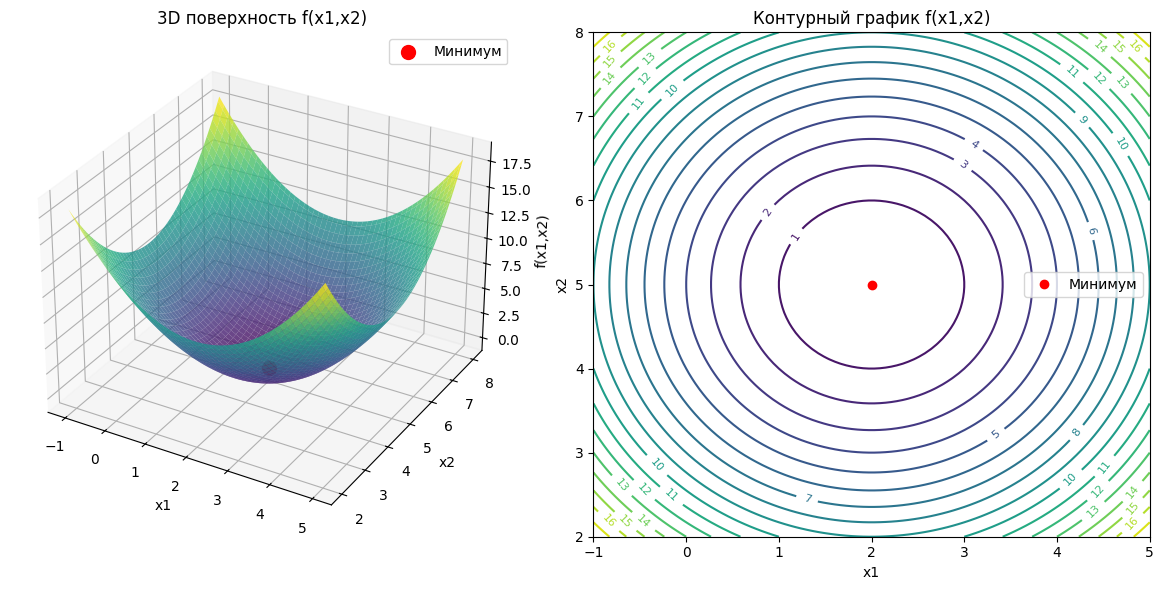

In [82]:
x1, x2 = sp.symbols('x1 x2', real=True)
f = (x1-2)**2 + (x2-5)**2

grad = [sp.diff(f, v) for v in (x1, x2)]
crit = sp.solve(grad, (x1, x2))
val = sp.N(f.subs({x1:2, x2:5}))
H = sp.hessian(f, (x1, x2))

print("Координаты минимума:", crit)
print("Значение функции в минимуме:", val)
print("Гессиан:\n", H)

f_numeric = sp.lambdify((x1, x2), f, "numpy")

x1_vals = np.linspace(-1, 5, 100)
x2_vals = np.linspace(2, 8, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = f_numeric(X1, X2)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.scatter(2, 5, 0, color='red', s=100, label='Минимум')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')
ax.set_title('3D поверхность f(x1,x2)')
ax.legend()

ax2 = fig.add_subplot(122)
contours = ax2.contour(X1, X2, Z, levels=20, cmap='viridis')
ax2.clabel(contours, inline=True, fontsize=8)
ax2.plot(2, 5, 'ro', label='Минимум')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Контурный график f(x1,x2)')
ax2.legend()

plt.tight_layout()
plt.show()